# Project on credit card fraud detection :

### Introduction
The objective in this project is to build machine learning models to classify or identify fraudulent card transactions from a given card transactions data.  

### Data Description

The [dataset](https://www.kaggle.com/mlg-ulb/creditcardfraud/data) contains two-days credit card transactions made in September 2013 by European cardholders. The dataset is highly unbalanced with a low percentage of fraudulent transactions within several records of normal transactions. The positive class (frauds) account for 0.172% (492 frauds out of 284,807 transactions) of all transactions.

Features V1, V2, ... V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset.  Feature 'Class' is the target variable with value 1 in case of fraud and 0 otherwise. 

## Import Libraries

To get started with the project first of all we need to import the required libraries  into our notebook .

In [1]:
from IPython.display import HTML
HTML('''<script>
code_show_err=false; 
function code_toggle_err() {
 if (code_show_err){
 $('div.output_stderr').hide();
 } else {
 $('div.output_stderr').show();
 }
 code_show_err = !code_show_err
} 
$( document ).ready(code_toggle_err);
</script>
To toggle on/off output_stderr, click <a href="javascript:code_toggle_err()">here</a>.''')

In [2]:
import pandas as pd
import numpy as np
import keras
import warnings
warnings.filterwarnings(action='once')
np.random.seed(2)

C:\Users\JIGYASHU SURAJ\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
C:\Users\JIGYASHU SURAJ\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\JIGYASHU SURAJ\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\JIGYASHU SURAJ\Anaconda3\lib\site-p

### Load Data  
The dataset used in this project is freely available at: https://www.kaggle.com/mlg-ulb/creditcardfraud/data

In [3]:
data = pd.read_csv('creditcard.csv')

We have imported the data

## Data exploration

In [4]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


## Pre-processing

In [5]:
from sklearn.preprocessing import StandardScaler
data['normalizedAmount'] = StandardScaler().fit_transform(data['Amount'].values.reshape(-1,1))
data = data.drop(['Amount'],axis=1)

C:\Users\JIGYASHU SURAJ\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216, got 192
  return f(*args, **kwds)
C:\Users\JIGYASHU SURAJ\Anaconda3\lib\importlib\_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)
C:\Users\JIGYASHU SURAJ\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216, got 192
  return f(*args, **kwds)
C:\Users\JIGYASHU SURAJ\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216, got 192
  return f(*args, **kwds)
C:\Users\JIGYASHU SURAJ\Anaconda3\lib\importlib\_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)


Here we have all the scaled values in tha columns v1 to v28 but in amount column the values are out of the range so we have to
scale the values . so we have brought the values in the range -1 to 1 .

In [6]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,normalizedAmount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403


In [7]:
data = data.drop(['Time'],axis=1)
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,normalizedAmount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403


In [8]:
X = data.iloc[:, data.columns != 'Class']
y = data.iloc[:, data.columns == 'Class']

We have separated the features and labels .

In [9]:
y.head()

,Class
0,0
1,0
2,0
3,0
4,0


In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state=0)

C:\Users\JIGYASHU SURAJ\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216, got 192
  return f(*args, **kwds)
C:\Users\JIGYASHU SURAJ\Anaconda3\lib\importlib\_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)


After that we splitted the data into train set and test set

In [11]:
X_train.shape

(199364, 29)

In [12]:
X_test.shape

(85443, 29)

In [13]:
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

Here we converted the dataframe into array so that further processing will get easier for us

## Deep neural network

In this part we have to apply deep learning to the dataset so firstly we imported the libraries and then start processing .

In [14]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

Then we have tio build the model so we added some input , output and hidden layer into our model added some drop out and 
constructed the model as per our convinience .

In [15]:
model = Sequential([
    Dense(units=16, input_dim = 29,activation='relu'),
    Dense(units=24,activation='relu'),
    Dropout(0.5),
    Dense(20,activation='relu'),
    Dense(24,activation='relu'),
    Dense(1,activation='sigmoid'),
])

Instructions for updating:
Colocations handled automatically by placer.


C:\Users\JIGYASHU SURAJ\Anaconda3\lib\site-packages\tensorflow\python\framework\tensor_util.py:125: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  tensor_proto.float_val.extend([np.asscalar(x) for x in proto_values])


Then we checked the summary of the model .

In [16]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 16)                480       
_________________________________________________________________
dense_2 (Dense)              (None, 24)                408       
_________________________________________________________________
dropout_1 (Dropout)          (None, 24)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 20)                500       
_________________________________________________________________
dense_4 (Dense)              (None, 24)                504       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 25        
Total params: 1,917
Trainable params: 1,917
Non-trainable params: 0
____________________________________________________

## Training

SO its time to train our model that we have constructed before . To do so we have to feed the data into the model .

In [17]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model.fit(X_train,y_train,batch_size=15,epochs=5)

C:\Users\JIGYASHU SURAJ\Anaconda3\lib\site-packages\tensorflow\python\framework\tensor_util.py:134: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  tensor_proto.int64_val.extend([np.asscalar(x) for x in proto_values])


Instructions for updating:
Use tf.cast instead.
Epoch 1/5
199364/199364 [==============================] - 32s 158us/step - loss: 0.0103 - accuracy: 0.9979
Epoch 2/5
199364/199364 [==============================] - 29s 147us/step - loss: 0.0043 - accuracy: 0.9994
Epoch 3/5
199364/199364 [==============================] - 29s 148us/step - loss: 0.0036 - accuracy: 0.9994
Epoch 4/5
199364/199364 [==============================] - 34s 172us/step - loss: 0.0036 - accuracy: 0.9994
Epoch 5/5
199364/199364 [==============================] - 30s 152us/step - loss: 0.0033 - accuracy: 0.9994


In [18]:
score = model.evaluate(X_test, y_test)

85443/85443 [==============================] - 2s 24us/step


After training the model its time to feed our test data into our model and predict the label to chechk the performance of
the model . We fed the test data and predicted output and evaluated the result and the final result id=s stored in score 
variable . 

In [19]:
print(score)

[0.0040842663192864085, 0.999426543712616]


Here we analysed the performance of the model and got that it is giving 99.94% accuracy which is a pretty good result .
to proceed further we have to check the cinfusion matrix to gain a clear idea about the result .

In [20]:
y_pred = model.predict(X_test)
y_test = pd.DataFrame(y_test)

C:\Users\JIGYASHU SURAJ\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216, got 192
  return f(*args, **kwds)
C:\Users\JIGYASHU SURAJ\Anaconda3\lib\importlib\_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)
C:\Users\JIGYASHU SURAJ\Anaconda3\lib\site-packages\matplotlib\colors.py:101: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  ret = np.asscalar(ex)


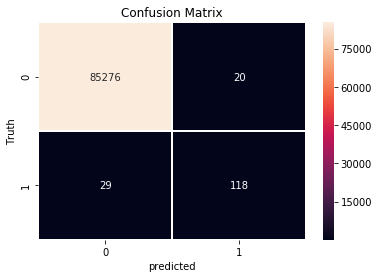

In [21]:
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt # Import matplotlib for data visualisation
import seaborn as sns # Statistical data visualization
%matplotlib inline
cm = confusion_matrix(y_test, y_pred.round())
sns.heatmap(cm, annot=True,linewidths=1,fmt = 'd')
plt.xlabel('predicted')
plt.ylabel('Truth')
plt.title('Confusion Matrix')
plt.show()

C:\Users\JIGYASHU SURAJ\Anaconda3\lib\site-packages\matplotlib\colors.py:101: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  ret = np.asscalar(ex)


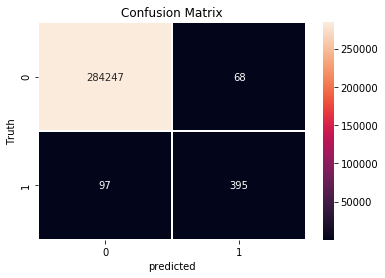

In [22]:
y_pred = model.predict(X)
y_expected = pd.DataFrame(y)
cm = confusion_matrix(y_expected, y_pred.round())
sns.heatmap(cm, annot=True,linewidths=1,fmt = 'd')
plt.xlabel('predicted')
plt.ylabel('Truth')
plt.title('Confusion Matrix')
plt.show()

from the above analysis we got that the model is predicting 104 fraud transition as valid transition which may lead to a 
great loss for the bank hence we have to do something to o=imperove the model performance .

## SMOTE

So here we are applting over sampling to match the no of instances in each class. Basically we are having more no of
valid transition so just have matched no of fraud transition with it .

In [23]:
from imblearn.over_sampling import SMOTE

C:\Users\JIGYASHU SURAJ\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216, got 192
  return f(*args, **kwds)
C:\Users\JIGYASHU SURAJ\Anaconda3\lib\importlib\_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)


In [24]:
#tremshampling the data
X_resample, y_resample = SMOTE().fit_sample(X,y.values.ravel())

In [25]:
y_resample = pd.DataFrame(y_resample)
X_resample = pd.DataFrame(X_resample)

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X_resample,y_resample,test_size=0.3)

In [27]:
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [28]:
#chechking the accuracy
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model.fit(X_train,y_train,batch_size=15,epochs=5)

C:\Users\JIGYASHU SURAJ\Anaconda3\lib\site-packages\tensorflow\python\framework\tensor_util.py:134: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  tensor_proto.int64_val.extend([np.asscalar(x) for x in proto_values])
C:\Users\JIGYASHU SURAJ\Anaconda3\lib\site-packages\tensorflow\python\framework\tensor_util.py:125: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  tensor_proto.float_val.extend([np.asscalar(x) for x in proto_values])
C:\Users\JIGYASHU SURAJ\Anaconda3\lib\site-packages\tensorflow\python\framework\tensor_util.py:125: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  tensor_proto.float_val.extend([np.asscalar(x) for x in proto_values])
C:\Users\JIGYASHU SURAJ\Anaconda3\lib\site-packages\tensorflow\python\framework\tensor_util.py:125: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  tensor_proto.float_val.ext

C:\Users\JIGYASHU SURAJ\Anaconda3\lib\site-packages\tensorflow\python\framework\tensor_util.py:125: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  tensor_proto.float_val.extend([np.asscalar(x) for x in proto_values])
C:\Users\JIGYASHU SURAJ\Anaconda3\lib\site-packages\tensorflow\python\framework\tensor_util.py:131: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  tensor_proto.int_val.extend([np.asscalar(x) for x in proto_values])
C:\Users\JIGYASHU SURAJ\Anaconda3\lib\site-packages\tensorflow\python\framework\tensor_util.py:125: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  tensor_proto.float_val.extend([np.asscalar(x) for x in proto_values])
C:\Users\JIGYASHU SURAJ\Anaconda3\lib\site-packages\tensorflow\python\framework\tensor_util.py:131: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  tensor_proto.int_val.extend(

C:\Users\JIGYASHU SURAJ\Anaconda3\lib\site-packages\tensorflow\python\framework\tensor_util.py:125: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  tensor_proto.float_val.extend([np.asscalar(x) for x in proto_values])
C:\Users\JIGYASHU SURAJ\Anaconda3\lib\site-packages\tensorflow\python\framework\tensor_util.py:125: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  tensor_proto.float_val.extend([np.asscalar(x) for x in proto_values])
C:\Users\JIGYASHU SURAJ\Anaconda3\lib\site-packages\tensorflow\python\framework\tensor_util.py:125: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  tensor_proto.float_val.extend([np.asscalar(x) for x in proto_values])
C:\Users\JIGYASHU SURAJ\Anaconda3\lib\site-packages\tensorflow\python\framework\tensor_util.py:125: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  tensor_proto.float_val.ext

Epoch 1/5
398041/398041 [==============================] - 55s 138us/step - loss: 0.0332 - accuracy: 0.9891
Epoch 2/5
398041/398041 [==============================] - 53s 132us/step - loss: 0.0129 - accuracy: 0.9966
Epoch 3/5
398041/398041 [==============================] - 50s 125us/step - loss: 0.0103 - accuracy: 0.9974
Epoch 4/5
398041/398041 [==============================] - 48s 120us/step - loss: 0.0094 - accuracy: 0.9978
Epoch 5/5
398041/398041 [==============================] - 48s 121us/step - loss: 0.0090 - accuracy: 0.9979


C:\Users\JIGYASHU SURAJ\Anaconda3\lib\site-packages\matplotlib\colors.py:101: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  ret = np.asscalar(ex)
C:\Users\JIGYASHU SURAJ\Anaconda3\lib\site-packages\matplotlib\colors.py:101: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  ret = np.asscalar(ex)


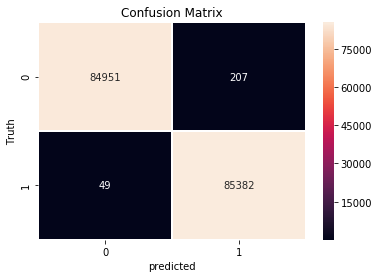

In [29]:
y_pred = model.predict(X_test)
y_expected = pd.DataFrame(y_test)
cm = confusion_matrix(y_expected, y_pred.round())
sns.heatmap(cm, annot=True,linewidths=1,fmt = 'd')
plt.xlabel('predicted')
plt.ylabel('Truth')
plt.title('Confusion Matrix')
plt.show()

C:\Users\JIGYASHU SURAJ\Anaconda3\lib\site-packages\matplotlib\colors.py:101: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  ret = np.asscalar(ex)
C:\Users\JIGYASHU SURAJ\Anaconda3\lib\site-packages\matplotlib\colors.py:101: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  ret = np.asscalar(ex)


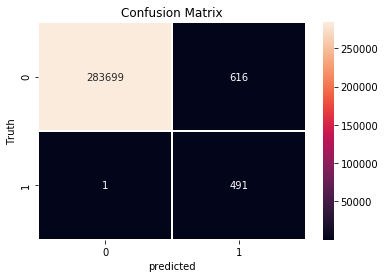

In [30]:
y_pred = model.predict(X)
y_expected = pd.DataFrame(y)
cm = confusion_matrix(y_expected, y_pred.round())
sns.heatmap(cm, annot=True,linewidths=1,fmt = 'd')
plt.xlabel('predicted')
plt.ylabel('Truth')
plt.title('Confusion Matrix')
plt.show()

Ans after doing so we got that our model is predicting only two fraud transition as valid one which can be considered as 
a good result so we stopped our processing here and concluded the model.